In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
from scipy.special import erfc

In [2]:
path = os.path.abspath('../../../0_MOOSE_Input_Files/Heat_Sources/')

# Heat Source Visualized

## 3D view

## 2D Top View

In [ ]:
cmaps = ['bwr', 'seismic', 'hsv', 'jet', 'coolwarm', 'viridis', 'plasma', 'cividis', 'inferno', 'magma']
x = np.linspace(-100e-6, 100e-6, 200)
y = np.linspace(-100e-6, 100e-6, 200)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)

### RingHS

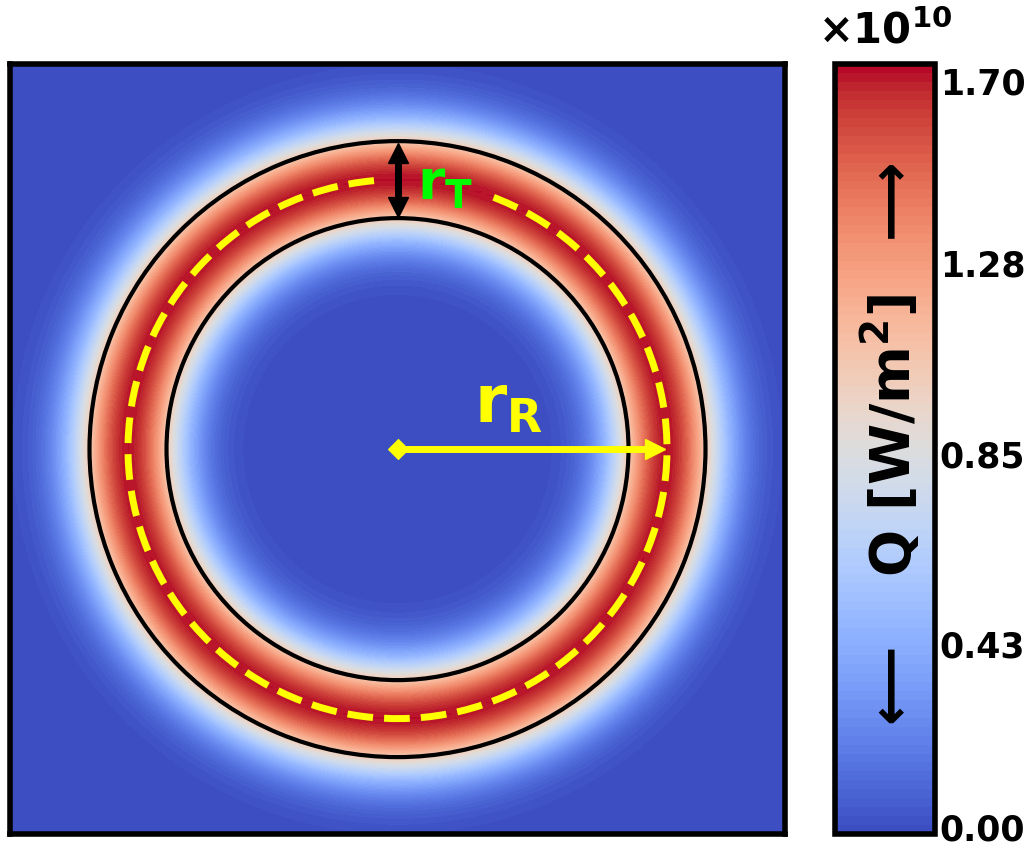

In [109]:

def RingHS(P, eta, r_R, r_T, A, Ca, Cb, Factor, i):
    rR, rT = r_R*1.0e-6, r_T*1.0e-6  # scaling unit to meter
    # sigma = rT/2
    # F = np.where((rR-(rT/2)<=r) & (r<=rR+(rT/2)), 1, 0)
    F=1
    Y = np.exp(-rR**2 / (2 * (rT/2)**2)) + (rR / (rT/2)) * (np.pi / 2)**0.5 * erfc(-rR / ((rT/2) * 2**0.5))
    Q = F * ((Ca * A * P * eta) / (np.pi * rT**2 * Y)) * np.exp(-Cb * ((r - rR)**2 / (rT**2)))

    fig, ax1 = plt.subplots(1,1, figsize=(10,10), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))
    
    hmap1 = plt.contourf(x*1e6, y*1e6, Q, levels=100, cmap=cmaps[i])

    circle1 = ax1.add_patch(patches.Arc((0,0), 2*(r_R+(r_T/2)), 2*(r_R+(r_T/2)), angle=0, theta1=0.0, theta2=360, color='k', linestyle = '-', linewidth=3, fill=False))
    circle2 = ax1.add_patch(patches.Arc((0,0), 2*r_R, 2*r_R, angle=95.0, theta1=0.0, theta2=335, color='yellow', linestyle = '--', linewidth=5, fill=False))
    circle3 = ax1.add_patch(patches.Arc((0,0), 2*(r_R-(r_T/2)), 2*(r_R-(r_T/2)), angle=0, theta1=0.0, theta2=360, color='k', linestyle = '-', linewidth=3, fill=False))

    ax1.scatter(0,0, color='yellow', s=100, marker ='D')

    ax2 = fig.add_axes([0.95, 0.11, 0.1, 0.77]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='k',  labelpad=-120, fontsize=40, rotation=90, weight='bold')
    cbar.set_ticks([np.max(Q)*0.01, (np.max(Q))/4, (np.max(Q))/2, (np.max(Q))*3/4, np.max(Q)*0.99], labels=[f'{np.min(Q)/1e10:.2f}',f'{(np.max(Q)/4)/1e10:.2f}',  f'{(np.max(Q)/2)/1e10:.2f}',f'{(np.max(Q)*3/4)/1e10:.2f}',  f'{np.max(Q)/1e10:.2f}'], weight='bold') 
    cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=30, color='k', weight='bold', pad=15)

    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.annotate(r'r$\mathbf{_R}$', xy=(0.5, 0.5), xytext=(20, 7), rotation=0, fontsize = 47, weight = 'bold', color='yellow')
    ax1.annotate(r'r$\mathbf{_T}$', xy=(0.5, 0.5), xytext=(5, 65), rotation=0, fontsize = 40, weight = 'bold', color='lime')

    ax1.hlines(y=0, xmin=0, xmax=65, linewidth=5, color='yellow')
    ax1.plot(67, 0, marker='>', color='yellow', markersize=15)
    
    ax1.vlines(x=0, ymin=63, ymax=77, linewidth=5, color='k')
    ax1.plot(0, 77, marker='^', color='k', markersize=15)
    ax1.plot(0, 63, marker='v', color='k', markersize=15)


    ax1.axis('equal')
    ax1.spines[:].set_linewidth(4)
    ax2.spines[:].set_linewidth(4)
    
    # plt.savefig('../../figures/RingHS.png',bbox_inches='tight', dpi=800)
    plt.show()


RingHS(P=250, eta=0.75, r_R=70, r_T=20, A=1, Ca=2.0, Cb=2.0, Factor=1e-4, i=4)

### GaussianHS

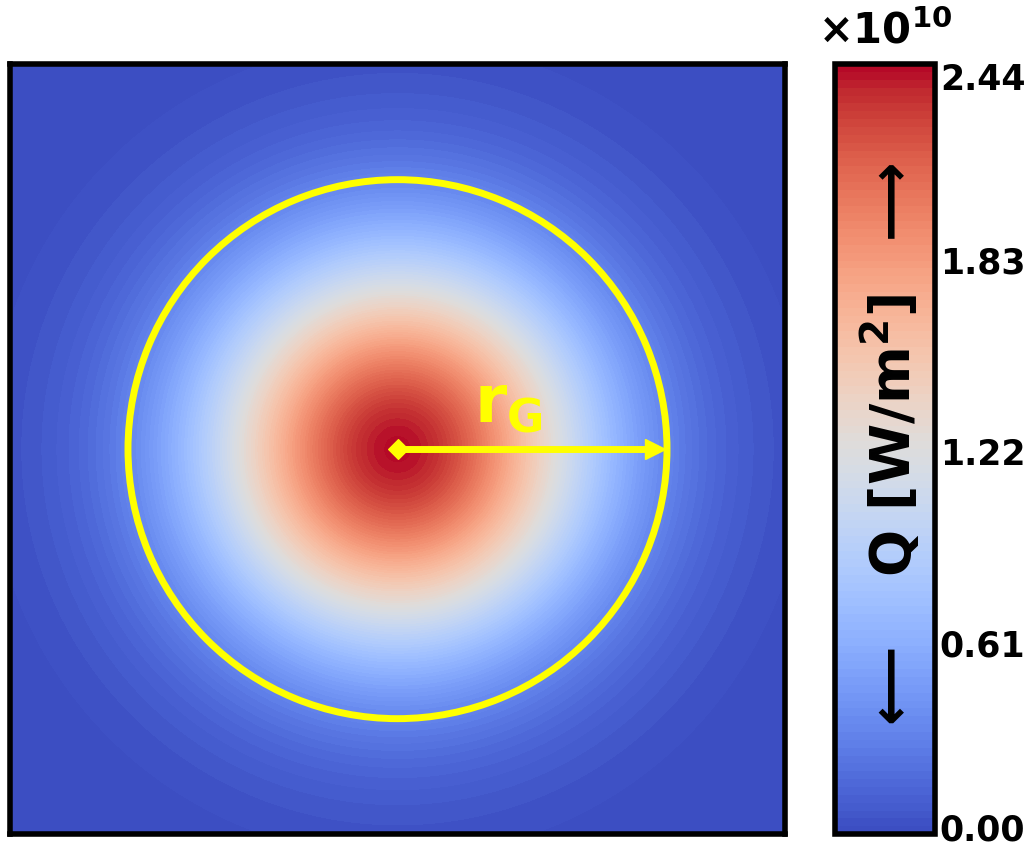

In [110]:
def GaussianHS(P, eta, r_G, A, Ca, Cb, Factor, i):
    rG = r_G*1.0e-6 # scaling unit to meter
    # sigma = rT/2
    # F = np.where((rR-(rT/2)<=r) & (r<=rR+(rT/2)), 1, 0)
    F=1
    
    Q = F * ((Ca * A * P * eta) / (np.pi * rG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))

    fig, ax1 = plt.subplots(1,1, figsize=(10,10), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))
    
    hmap1 = plt.contourf(x*1e6, y*1e6, Q, levels=100, cmap=cmaps[i])

    circle1 = ax1.add_patch(patches.Arc((0,0), 2*r_G, 2*r_G, angle=0, theta1=0.0, theta2=360, color='yellow', linestyle = '-', linewidth=5, fill=False))
    ax1.scatter(0,0, color='yellow', s=100, marker ='D')

    ax2 = fig.add_axes([0.95, 0.11, 0.1, 0.77]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='k',  labelpad=-120, fontsize=40, rotation=90, weight='bold')
    cbar.set_ticks([np.max(Q)*0.01, (np.max(Q))/4, (np.max(Q))/2, (np.max(Q))*3/4, np.max(Q)*0.99], labels=[f'{np.min(Q)/1e10:.2f}',f'{(np.max(Q)/4)/1e10:.2f}',  f'{(np.max(Q)/2)/1e10:.2f}',f'{(np.max(Q)*3/4)/1e10:.2f}',  f'{np.max(Q)/1e10:.2f}'], weight='bold') 
    cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=30, color='k', weight='bold', pad=15)

    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.annotate(r'r$\mathbf{_G}$', xy=(0.5, 0.5), xytext=(20, 7), rotation=0, fontsize = 47, weight = 'bold', color='yellow')

    ax1.hlines(y=0, xmin=0, xmax=65, linewidth=5, color='yellow')
    ax1.plot(67, 0, marker='>', color='yellow', markersize=15)
    

    ax1.axis('equal')
    ax1.spines[:].set_linewidth(4)
    ax2.spines[:].set_linewidth(4)
    
    # plt.savefig('../../figures/GaussianHS.png',bbox_inches='tight', dpi=800)
    plt.show()


GaussianHS(P=250, eta=0.75, r_G=70, A=1, Ca=2.0, Cb=2.0, Factor=1e-4, i=4)

### FlatTopHS

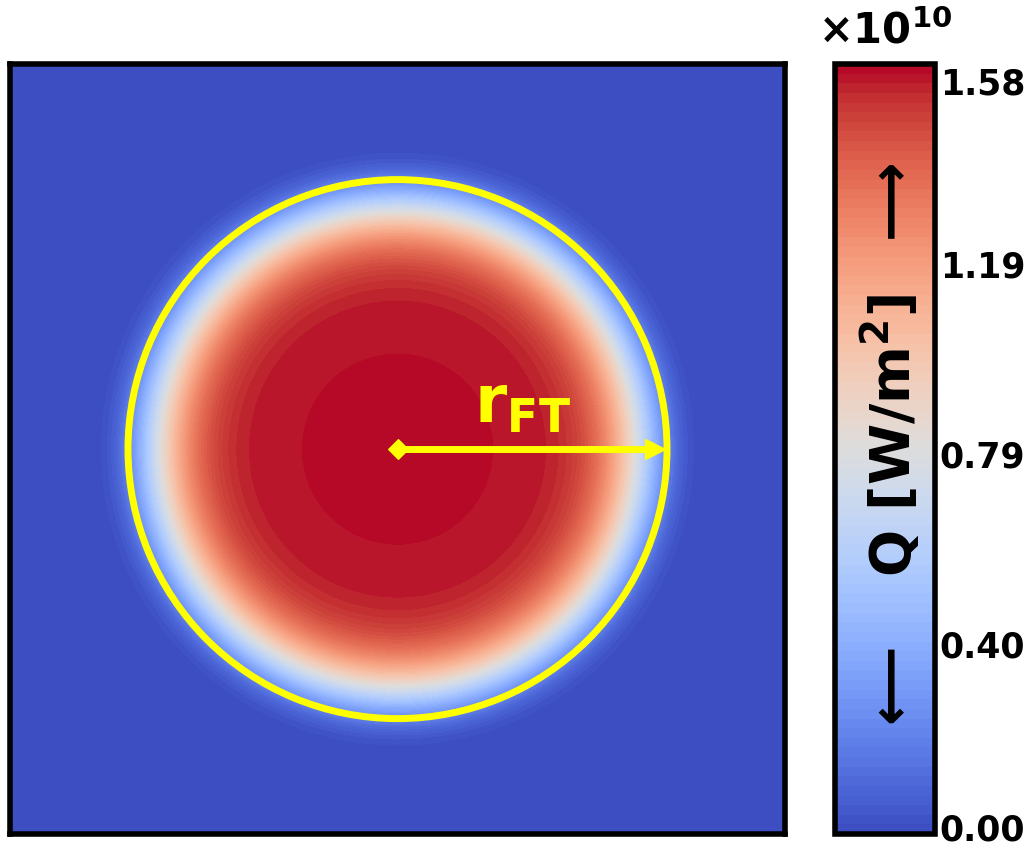

In [112]:

def FlatTopHS(P, eta, r_G, A, Ca, Cb, k, Factor, i):
    rG = r_G*1.0e-6 # scaling unit to meter
    # sigma = rT/2
    # F = np.where((rR-(rT/2)<=r) & (r<=rR+(rT/2)), 1, 0)
    F=1
    
    # Q = F * ((Ca * A * P * eta) / (np.pi * rG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))
    Q = F*((Ca**(1/k)*k*P*eta*A)/(np.pi*rG**2*math.gamma(1/k)))*(np.exp(-Cb*(r**2/rG**2)**k))

    fig, ax1 = plt.subplots(1,1, figsize=(10,10), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))
    
    hmap1 = plt.contourf(x*1e6, y*1e6, Q, levels=100, cmap=cmaps[i])
    circle1 = ax1.add_patch(patches.Arc((0,0), 2*r_G, 2*r_G, angle=0, theta1=0.0, theta2=360, color='yellow', linestyle = '-', linewidth=5, fill=False))
    ax1.scatter(0,0, color='yellow', s=100, marker ='D')

    ax2 = fig.add_axes([0.95, 0.11, 0.1, 0.77]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='k',  labelpad=-120, fontsize=40, rotation=90, weight='bold')
    cbar.set_ticks([np.max(Q)*0.01, (np.max(Q))/4, (np.max(Q))/2, (np.max(Q))*3/4, np.max(Q)*0.99], labels=[f'{np.min(Q)/1e10:.2f}',f'{(np.max(Q)/4)/1e10:.2f}',  f'{(np.max(Q)/2)/1e10:.2f}',f'{(np.max(Q)*3/4)/1e10:.2f}',  f'{np.max(Q)/1e10:.2f}'], weight='bold') 
    cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=30, color='k', weight='bold', pad=15)

    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.annotate(r'r$\mathbf{_{FT}}$', xy=(0.5, 0.5), xytext=(20, 7), rotation=0, fontsize = 47, weight = 'bold', color='yellow')

    ax1.hlines(y=0, xmin=0, xmax=65, linewidth=5, color='yellow')
    ax1.plot(67, 0, marker='>', color='yellow', markersize=15)
    

    ax1.axis('equal')
    ax1.spines[:].set_linewidth(4)
    ax2.spines[:].set_linewidth(4)
    
    # plt.savefig('../../figures/FlatTopHS.png',bbox_inches='tight', dpi=800)
    plt.show()


FlatTopHS(P=250, eta=0.75, r_G=70, A=1, Ca=2.0, Cb=2.0, k=4.2, Factor=1e-4, i=4)

### BesselHS

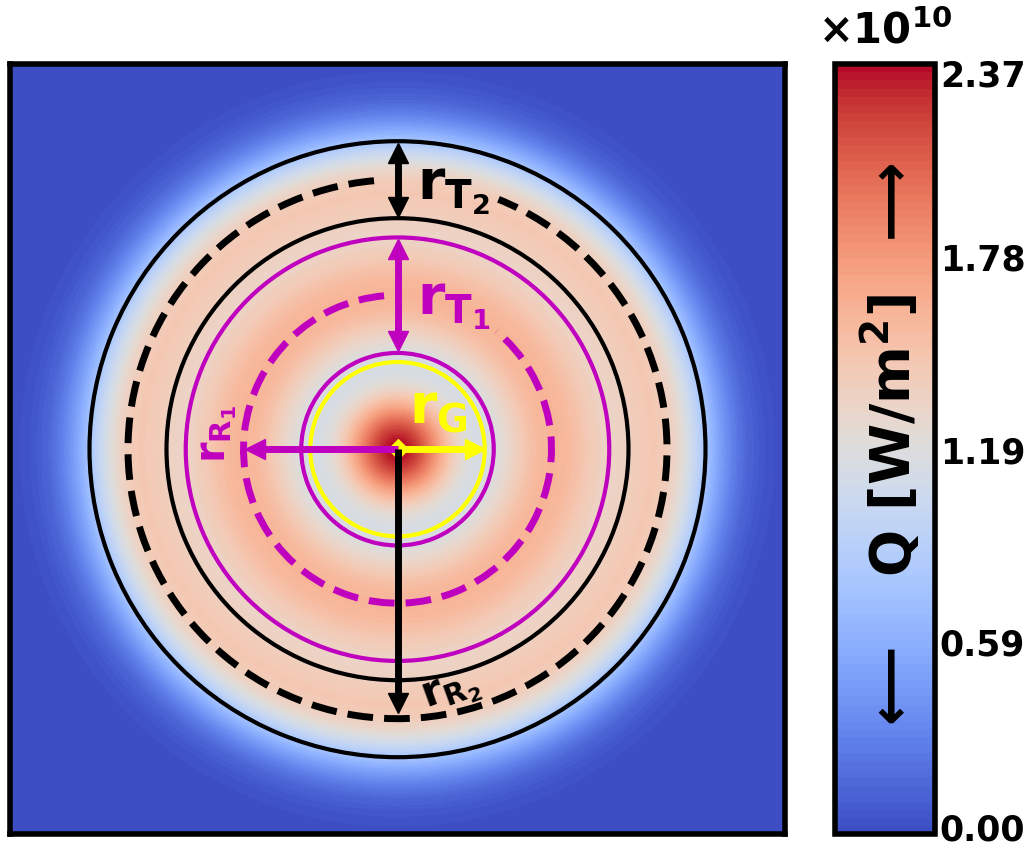

In [117]:

def BesselHS(P, a0, a1, a2, eta, r_G, r_R1, r_T1, r_R2, r_T2, A, Ca, Cb, Factor, i):
    rG, rR1, rT1, rR2, rT2 = r_G*1.0e-6, r_R1*1.0e-6, r_T1*1.0e-6, r_R2*1.0e-6, r_T2*1.0e-6  # scaling unit to meter
    # sigma = rT/2
    # F = np.where((rR-(rT/2)<=r) & (r<=rR+(rT/2)), 1, 0)
    F=1
    Y1 = np.exp(-rR1**2 / (2 * (rT1/2)**2)) + (rR1 / (rT1/2)) * (np.pi / 2)**0.5 * erfc(-rR1 / ((rT1/2) * 2**0.5))
    Y2 = np.exp(-rR2**2 / (2 * (rT2/2)**2)) + (rR2 / (rT2/2)) * (np.pi / 2)**0.5 * erfc(-rR2 / ((rT2/2) * 2**0.5))
    Q_G  = F * ((Ca * A * P * a0 * eta) / (np.pi * rG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))
    Q_R1 = F * ((Ca * A * P * a1 * eta) / (np.pi * rT1**2 * Y1)) * np.exp(-Cb * ((r - rR1)**2 / (rT1**2)))
    Q_R2 = F * ((Ca * A * P * a2 * eta) / (np.pi * rT2**2 * Y2)) * np.exp(-Cb * ((r - rR2)**2 / (rT2**2)))
    Q = Q_G + Q_R1 + Q_R2

    fig, ax1 = plt.subplots(1,1, figsize=(10,10), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))
    
    hmap1 = plt.contourf(x*1e6, y*1e6, Q, levels=100, cmap=cmaps[i])

    circ_G = ax1.add_patch(patches.Arc((0,0), 2*r_G, 2*r_G, angle=0, theta1=0.0, theta2=360, color='yellow', linestyle = '-', linewidth=3, fill=False))
    
    circ_R1O = ax1.add_patch(patches.Arc((0,0), 2*(r_R1+(r_T1/2)), 2*(r_R1+(r_T1/2)), angle=0, theta1=0.0, theta2=360, color='m', linestyle = '-', linewidth=3, fill=False))
    circ_R1 = ax1.add_patch(patches.Arc((0,0), 2*r_R1, 2*r_R1, angle=95.0, theta1=0.0, theta2=315, color='m', linestyle = '--', linewidth=5, fill=False))
    circ_R1I = ax1.add_patch(patches.Arc((0,0), 2*(r_R1-(r_T1/2)), 2*(r_R1-(r_T1/2)), angle=0, theta1=0.0, theta2=360, color='m', linestyle = '-', linewidth=3, fill=False))
    circ_R2O = ax1.add_patch(patches.Arc((0,0), 2*(r_R2+(r_T2/2)), 2*(r_R2+(r_T2/2)), angle=0, theta1=0.0, theta2=360, color='k', linestyle = '-', linewidth=3, fill=False))
    circ_R2 = ax1.add_patch(patches.Arc((0,0), 2*r_R2, 2*r_R2, angle=95.0, theta1=0.0, theta2=333, color='k', linestyle = '--', linewidth=5, fill=False))
    circ_R2I = ax1.add_patch(patches.Arc((0,0), 2*(r_R2-(r_T2/2)), 2*(r_R2-(r_T2/2)), angle=0, theta1=0.0, theta2=360, color='k', linestyle = '-', linewidth=3, fill=False))

    ax1.scatter(0,0, color='yellow', s=100, marker ='D')

    ax2 = fig.add_axes([0.95, 0.11, 0.1, 0.77]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='k',  labelpad=-120, fontsize=40, rotation=90, weight='bold')
    cbar.set_ticks([np.max(Q)*0.01, (np.max(Q))/4, (np.max(Q))/2, (np.max(Q))*3/4, np.max(Q)*0.99], labels=[f'{np.min(Q)/1e10:.2f}',f'{(np.max(Q)/4)/1e10:.2f}',  f'{(np.max(Q)/2)/1e10:.2f}',f'{(np.max(Q)*3/4)/1e10:.2f}',  f'{np.max(Q)/1e10:.2f}'], weight='bold') 
    cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=30, color='k', weight='bold', pad=15)

    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.annotate(r'r$\mathbf{_G}$', xy=(0.5, 0.5), xytext=(3, 7), rotation=0, fontsize = 40, weight = 'bold', color='yellow')
    ax1.annotate(r'r$\mathbf{_{R_1}}$', xy=(0.5, 0.5), xytext=(-52, 0), rotation=90, fontsize = 30, weight = 'bold', color='m')
    ax1.annotate(r'r$\mathbf{_{T_1}}$', xy=(0.5, 0.5), xytext=(5, 35), rotation=0, fontsize = 40, weight = 'bold', color='m')
    ax1.annotate(r'r$\mathbf{_{R_2}}$', xy=(0.5, 0.5), xytext=(5, -67), rotation=20, fontsize = 30, weight = 'bold', color='k')
    ax1.annotate(r'r$\mathbf{_{T_2}}$', xy=(0.5, 0.5), xytext=(5, 65), rotation=0, fontsize = 40, weight = 'bold', color='k')

    ax1.hlines(y=0, xmin=0, xmax=20, linewidth=5, color='yellow')
    ax1.plot(20, 0, marker='>', color='yellow', markersize=15)

    ax1.hlines(y=0, xmin=-35, xmax=0, linewidth=5, color='m')
    ax1.plot(-37, 0, marker='<', color='m', markersize=15)
    ax1.vlines(x=0, ymin=63, ymax=77, linewidth=5, color='k')
    ax1.plot(0, 77, marker='^', color='k', markersize=15)
    ax1.plot(0, 63, marker='v', color='k', markersize=15)

    ax1.vlines(x=0, ymin=-65, ymax=0, linewidth=5, color='k')
    ax1.plot(0, -66, marker='v', color='k', markersize=15)
    ax1.vlines(x=0, ymin=28, ymax=52, linewidth=5, color='m')
    ax1.plot(0, 52, marker='^', color='m', markersize=15)
    ax1.plot(0, 28, marker='v', color='m', markersize=15)


    ax1.axis('equal')
    ax1.spines[:].set_linewidth(4)
    ax2.spines[:].set_linewidth(4)
    
    # plt.savefig('../../figures/BesselHS.png',bbox_inches='tight', dpi=800)
    plt.show()


BesselHS(P=250, a0=0.1, a1=0.8, a2=0.7, eta=0.75, r_G=22.65, r_R1=40, r_T1=30, r_R2=70, r_T2=20, A=1, Ca=2.0, Cb=2.0, Factor=1e-4, i=4) # a0 = 0.1, a1 = 0.5, a2 = 0.4 # Actually

## All in One

In [103]:
cmaps = ['bwr', 'seismic', 'hsv', 'jet', 'coolwarm', 'viridis', 'plasma', 'cividis', 'inferno', 'magma']
x     = np.linspace(-100e-6, 100e-6, 200)
y     = np.linspace(-100e-6, 100e-6, 200)
x, y  = np.meshgrid(x, y)
r     = np.sqrt(x**2 + y**2)
P     = 250
a0    = 0.1
a1    = 0.8 # 0.5
a2    = 0.7 # 0.4
eta   = 0.75
r_G   = 70.0
r_R   = 70.0
r_T   = 20.0
r_BG  = 22.65
r_R1  = 40.0
r_T1  = 30.0
r_R2  = 70.0
r_T2  = 20.0
k     = 4.2
A     = 1
Ca    = 2.0
Cb    = 2.0
i     = 4
F     = 1
rG, rR, rT, rBG, rR1, rT1, rR2, rT2 = r_G*1.0e-6, r_R*1.0e-6, r_T*1.0e-6, r_BG*1.0e-6, r_R1*1.0e-6, r_T1*1.0e-6, r_R2*1.0e-6, r_T2*1.0e-6, # scaling unit to meter

/tmp/ipykernel_166140/1450874230.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


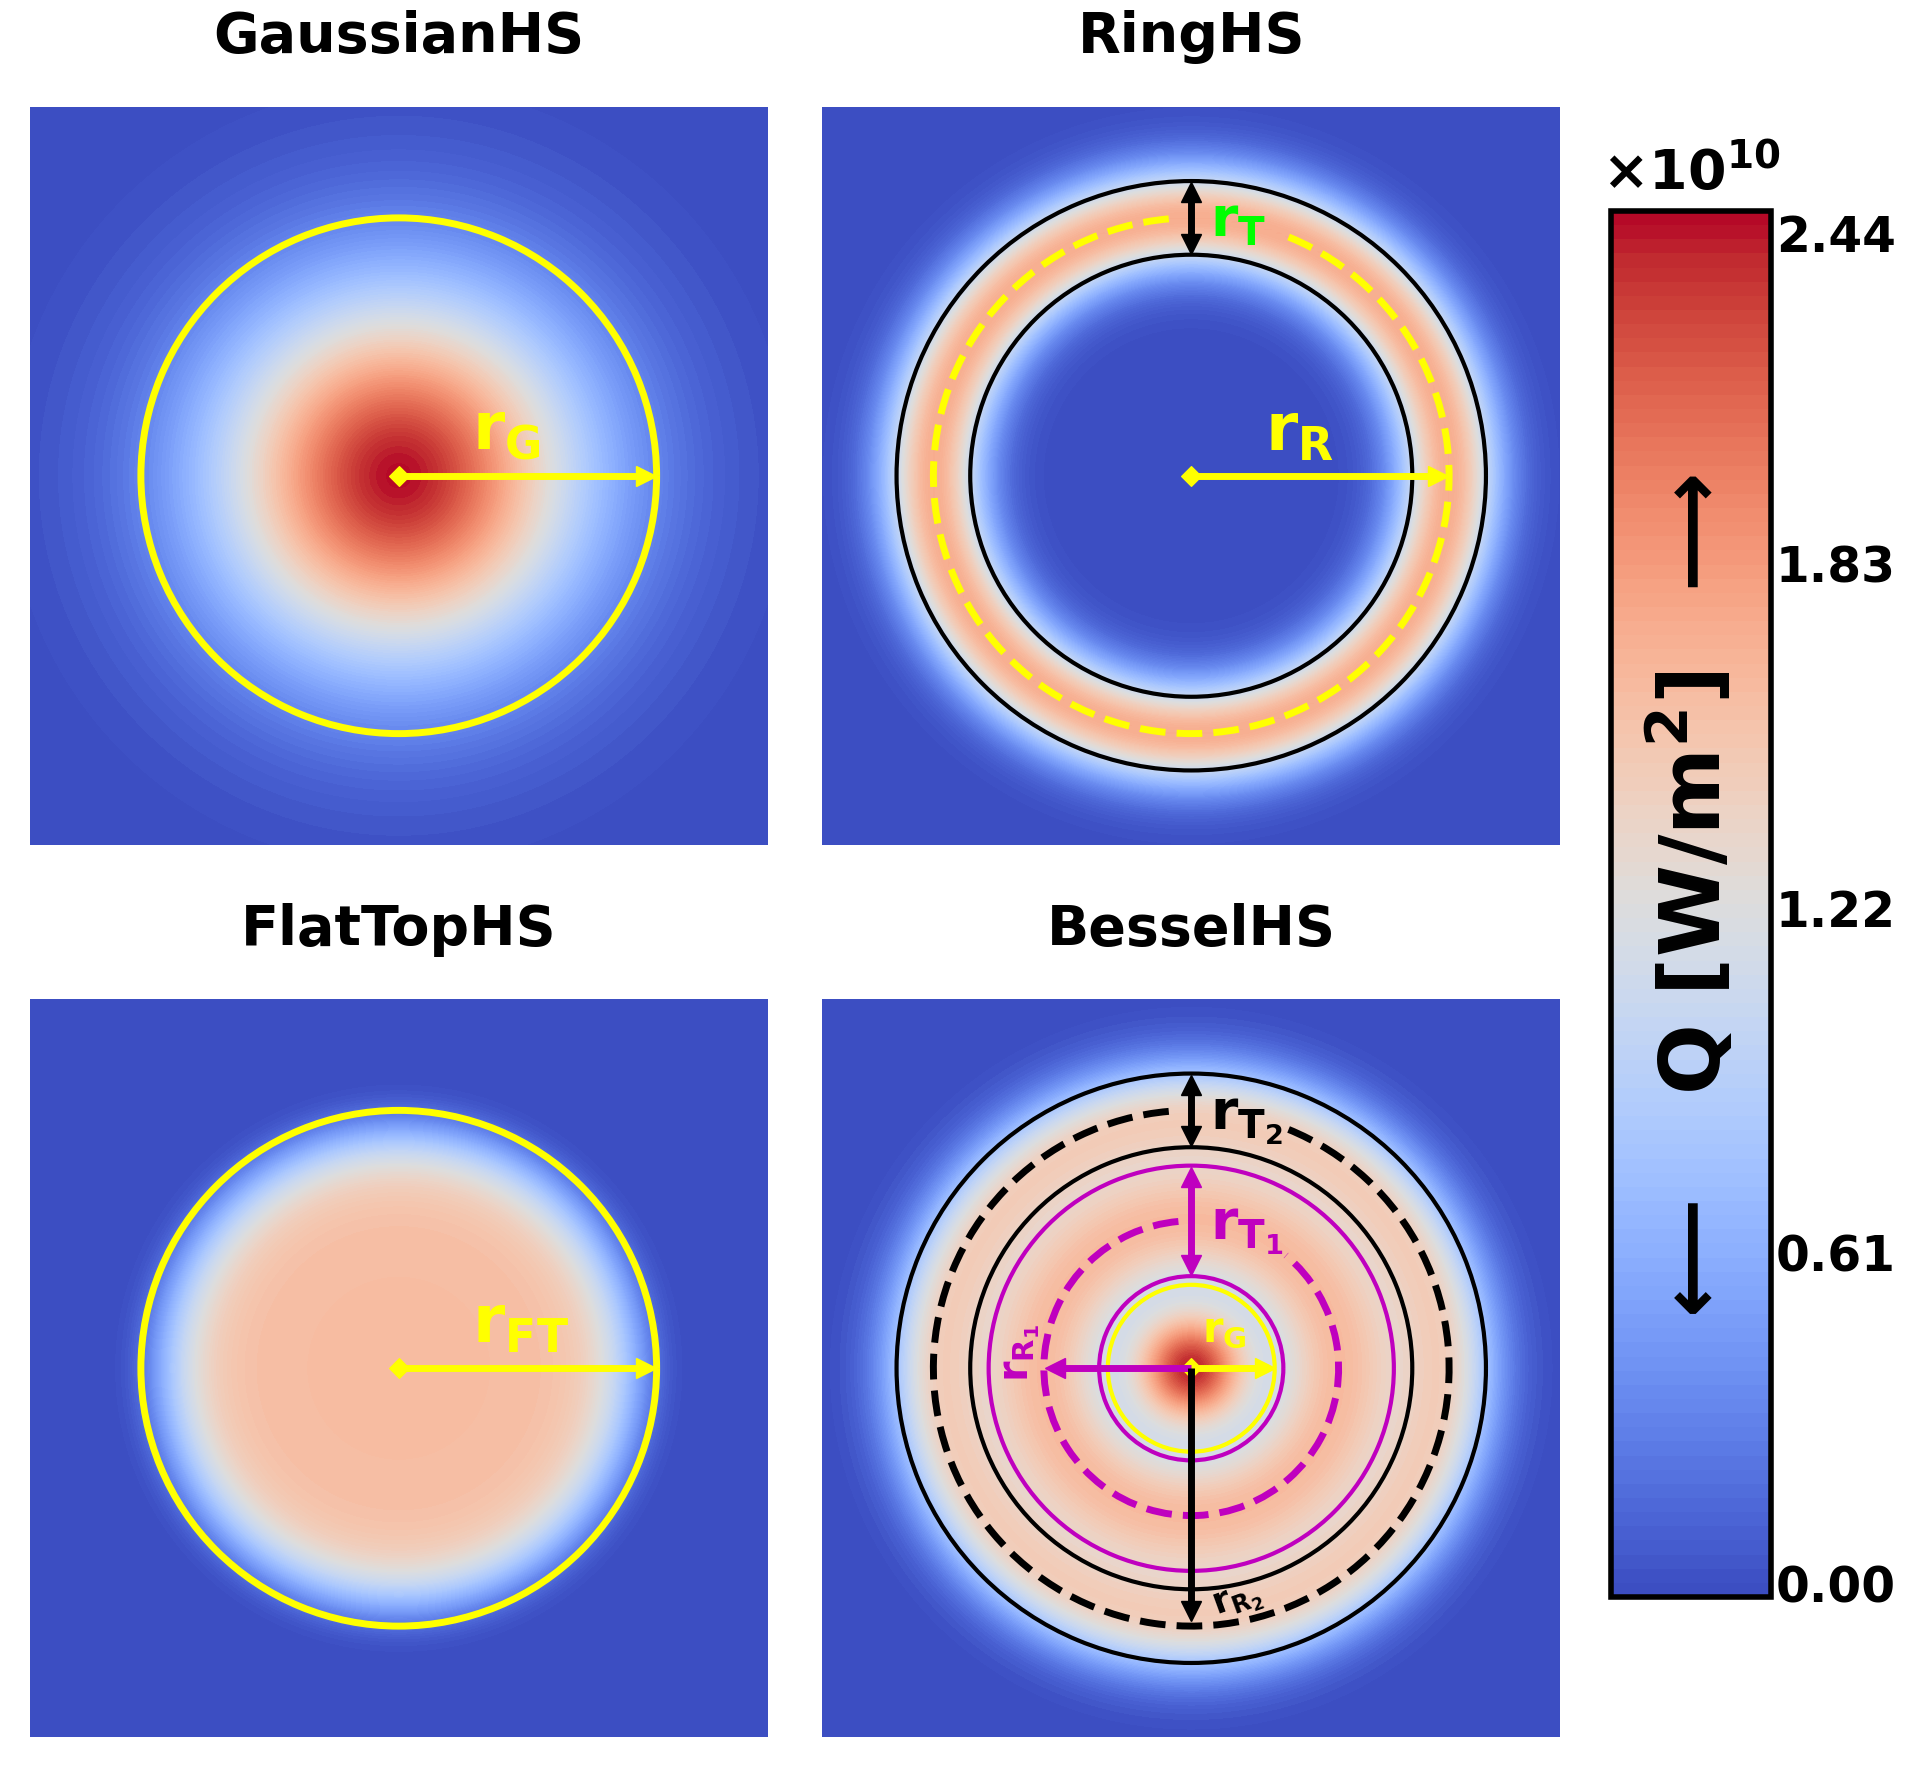

In [104]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,18), frameon=False)
[ax.set_facecolor((0, 0, 0, 0)) for ax in [ax1, ax2, ax3, ax4]]

########### Gaussian ######
Q_G = F * ((Ca * A * P * eta) / (np.pi * rG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))
hmap1 = ax1.contourf(x*1e6, y*1e6, Q_G, levels=100, cmap=cmaps[i])
circleG = ax1.add_patch(patches.Arc((0,0), 2*r_G, 2*r_G, angle=0, theta1=0.0, theta2=360, color='yellow', linestyle = '-', linewidth=5, fill=False))
ax1.scatter(0,0, color='yellow', s=100, marker ='D')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.annotate(r'r$\mathbf{_G}$', xy=(0.5, 0.5), xytext=(20, 7), rotation=0, fontsize = 47, weight = 'bold', color='yellow')
ax1.hlines(y=0, xmin=0, xmax=65, linewidth=5, color='yellow')
ax1.plot(67, 0, marker='>', color='yellow', markersize=15)
ax1.axis('equal')



########## Ring ########
Y = np.exp(-rR**2 / (2 * (rT/2)**2)) + (rR / (rT/2)) * (np.pi / 2)**0.5 * erfc(-rR / ((rT/2) * 2**0.5))
Q_R = F * ((Ca * A * P * eta) / (np.pi * rT**2 * Y)) * np.exp(-Cb * ((r - rR)**2 / (rT**2)))

hmap2 = ax2.contourf(x*1e6, y*1e6, Q_R, vmax = Q_G.max(), levels=100, cmap=cmaps[i])
circle1 = ax2.add_patch(patches.Arc((0,0), 2*(r_R+(r_T/2)), 2*(r_R+(r_T/2)), angle=0, theta1=0.0, theta2=360, color='k', linestyle = '-', linewidth=3, fill=False))
circle2 = ax2.add_patch(patches.Arc((0,0), 2*r_R, 2*r_R, angle=95.0, theta1=0.0, theta2=335, color='yellow', linestyle = '--', linewidth=5, fill=False))
circle3 = ax2.add_patch(patches.Arc((0,0), 2*(r_R-(r_T/2)), 2*(r_R-(r_T/2)), angle=0, theta1=0.0, theta2=360, color='k', linestyle = '-', linewidth=3, fill=False))
ax2.scatter(0,0, color='yellow', s=100, marker ='D')
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.annotate(r'r$\mathbf{_R}$', xy=(0.5, 0.5), xytext=(20, 7), rotation=0, fontsize = 47, weight = 'bold', color='yellow')
ax2.annotate(r'r$\mathbf{_T}$', xy=(0.5, 0.5), xytext=(5, 65), rotation=0, fontsize = 40, weight = 'bold', color='lime')
ax2.hlines(y=0, xmin=0, xmax=65, linewidth=5, color='yellow')
ax2.plot(67, 0, marker='>', color='yellow', markersize=15)
ax2.vlines(x=0, ymin=63, ymax=77, linewidth=5, color='k')
ax2.plot(0, 77, marker='^', color='k', markersize=15)
ax2.plot(0, 63, marker='v', color='k', markersize=15)
ax2.axis('equal')


############ Flat Top #####

Q_FT = F*((Ca**(1/k)*k*P*eta*A)/(np.pi*rG**2*math.gamma(1/k)))*(np.exp(-Cb*(r**2/rG**2)**k))
hmap3 = ax3.contourf(x*1e6, y*1e6, Q_FT, vmax=Q_G.max(), levels=100, cmap=cmaps[i])
circle1 = ax3.add_patch(patches.Arc((0,0), 2*r_G, 2*r_G, angle=0, theta1=0.0, theta2=360, color='yellow', linestyle = '-', linewidth=5, fill=False))
ax3.scatter(0,0, color='yellow', s=100, marker ='D')
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax3.annotate(r'r$\mathbf{_{FT}}$', xy=(0.5, 0.5), xytext=(20, 7), rotation=0, fontsize = 47, weight = 'bold', color='yellow')
ax3.hlines(y=0, xmin=0, xmax=65, linewidth=5, color='yellow')
ax3.plot(67, 0, marker='>', color='yellow', markersize=15)
ax3.axis('equal')


############# Bessel ########

Y1 = np.exp(-rR1**2 / (2 * (rT1/2)**2)) + (rR1 / (rT1/2)) * (np.pi / 2)**0.5 * erfc(-rR1 / ((rT1/2) * 2**0.5))
Y2 = np.exp(-rR2**2 / (2 * (rT2/2)**2)) + (rR2 / (rT2/2)) * (np.pi / 2)**0.5 * erfc(-rR2 / ((rT2/2) * 2**0.5))
Q_BG  = F * ((Ca * A * P * a0 * eta) / (np.pi * rBG**2)) * np.exp(-Cb * ((r)**2 / (rBG**2)))
Q_R1 = F * ((Ca * A * P * a1 * eta) / (np.pi * rT1**2 * Y1)) * np.exp(-Cb * ((r - rR1)**2 / (rT1**2)))
Q_R2 = F * ((Ca * A * P * a2 * eta) / (np.pi * rT2**2 * Y2)) * np.exp(-Cb * ((r - rR2)**2 / (rT2**2)))
Q_B = Q_BG + Q_R1 + Q_R2
hmap4 = ax4.contourf(x*1e6, y*1e6, Q_B, vmax=Q_G.max(), levels=100, cmap=cmaps[i])
circ_BG = ax4.add_patch(patches.Arc((0,0), 2*r_BG, 2*r_BG, angle=0, theta1=0.0, theta2=360, color='yellow', linestyle = '-', linewidth=3, fill=False))
circ_R1O = ax4.add_patch(patches.Arc((0,0), 2*(r_R1+(r_T1/2)), 2*(r_R1+(r_T1/2)), angle=0, theta1=0.0, theta2=360, color='m', linestyle = '-', linewidth=3, fill=False))
circ_R1 = ax4.add_patch(patches.Arc((0,0), 2*r_R1, 2*r_R1, angle=95.0, theta1=0.0, theta2=315, color='m', linestyle = '--', linewidth=5, fill=False))
circ_R1I = ax4.add_patch(patches.Arc((0,0), 2*(r_R1-(r_T1/2)), 2*(r_R1-(r_T1/2)), angle=0, theta1=0.0, theta2=360, color='m', linestyle = '-', linewidth=3, fill=False))
circ_R2O = ax4.add_patch(patches.Arc((0,0), 2*(r_R2+(r_T2/2)), 2*(r_R2+(r_T2/2)), angle=0, theta1=0.0, theta2=360, color='k', linestyle = '-', linewidth=3, fill=False))
circ_R2 = ax4.add_patch(patches.Arc((0,0), 2*r_R2, 2*r_R2, angle=95.0, theta1=0.0, theta2=333, color='k', linestyle = '--', linewidth=5, fill=False))
circ_R2I = ax4.add_patch(patches.Arc((0,0), 2*(r_R2-(r_T2/2)), 2*(r_R2-(r_T2/2)), angle=0, theta1=0.0, theta2=360, color='k', linestyle = '-', linewidth=3, fill=False))
ax4.scatter(0,0, color='yellow', s=100, marker ='D')
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax4.annotate(r'r$\mathbf{_G}$', xy=(0.5, 0.5), xytext=(3, 7), rotation=0, fontsize = 30, weight = 'bold', color='yellow')
ax4.annotate(r'r$\mathbf{_{R_1}}$', xy=(0.5, 0.5), xytext=(-52, 0), rotation=90, fontsize = 30, weight = 'bold', color='m')
ax4.annotate(r'r$\mathbf{_{T_1}}$', xy=(0.5, 0.5), xytext=(5, 35), rotation=0, fontsize = 40, weight = 'bold', color='m')
ax4.annotate(r'r$\mathbf{_{R_2}}$', xy=(0.5, 0.5), xytext=(5, -67), rotation=20, fontsize = 25, weight = 'bold', color='k')
ax4.annotate(r'r$\mathbf{_{T_2}}$', xy=(0.5, 0.5), xytext=(5, 65), rotation=0, fontsize = 40, weight = 'bold', color='k')
ax4.hlines(y=0, xmin=0, xmax=20, linewidth=5, color='yellow')
ax4.plot(20, 0, marker='>', color='yellow', markersize=15)
ax4.hlines(y=0, xmin=-35, xmax=0, linewidth=5, color='m')
ax4.plot(-37, 0, marker='<', color='m', markersize=15)
ax4.vlines(x=0, ymin=63, ymax=77, linewidth=5, color='k')
ax4.plot(0, 77, marker='^', color='k', markersize=15)
ax4.plot(0, 63, marker='v', color='k', markersize=15)
ax4.vlines(x=0, ymin=-65, ymax=0, linewidth=5, color='k')
ax4.plot(0, -66, marker='v', color='k', markersize=15)
ax4.vlines(x=0, ymin=28, ymax=52, linewidth=5, color='m')
ax4.plot(0, 52, marker='^', color='m', markersize=15)
ax4.plot(0, 28, marker='v', color='m', markersize=15)
ax4.axis('equal')
4
######### Color Bar
ax5 = fig.add_axes([1.01, 0.11, 0.1, 0.77]) 
ax5.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax5, orientation='vertical')
cbar.ax.tick_params(labelsize=35, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='k',  labelpad=-180, fontsize=60, rotation=90, weight='bold')
cbar.set_ticks([np.max(Q_G)*0.01, (np.max(Q_G))/4, (np.max(Q_G))/2, (np.max(Q_G))*3/4, np.max(Q_G)*0.99], labels=[f'{np.min(Q_G)/1e10:.2f}',f'{(np.max(Q_G)/4)/1e10:.2f}',  f'{(np.max(Q_G)/2)/1e10:.2f}',f'{(np.max(Q_G)*3/4)/1e10:.2f}',  f'{np.max(Q_G)/1e10:.2f}'], weight='bold') 
cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=40, color='k', weight='bold', pad=15)
ax5.spines[:].set_linewidth(4)

ax1.set_title("GaussianHS", fontsize=40, color='k', weight='bold', pad=-400)
ax2.set_title("RingHS", fontsize=40, color='k', weight='bold', pad=-400)
ax3.set_title("FlatTopHS", fontsize=40, color='k', weight='bold', pad=-400)
ax4.set_title("BesselHS", fontsize=40, color='k', weight='bold', pad=-400)

ax1.spines[:].set_linewidth(0)
ax2.spines[:].set_linewidth(0)
ax3.spines[:].set_linewidth(0)
ax4.spines[:].set_linewidth(0)

plt.tight_layout()
    
# plt.savefig('../../figures/HeatSources.png',bbox_inches='tight', dpi=800)


plt.show()


# Area of Meltpool | LIQUID Phase Comparison